# Homework 3

#### 3.a

To address this, we could asign numeric labels to three different categorical </p>
labels: </p>
***'setosa' = -1, versicolor = 0, virginica = 1*** </p>
With these values, we get the weights ***w*** from ***X*** and ***y***, </p>
and compute the projection of $\hat{y}$. At last, we round up the result ***a*** to our labels: </p>
$\hat{y}$ = -1, if a < -0.5, </p>
$\hat{y}$ = 0,  if -0.5 <= a <= 0.5, </p>
$\hat{y}$ = 1,  if a > 0.5

#### 3.b

In [13]:
import numpy as np
import scipy.io
data = scipy.io.loadmat("fisheriris.mat")
X = data['meas']
y = data['species']

# YOUR CODE BELOW (process and assign numerical values to ‘y‘ according
# to your (a), make sure ‘y‘ is a 1d numpy array. If dimensions are
# mismatching, you may find ‘y = y.flatten()‘ useful ) 
y = [sp[0][0] for sp in y]
replace = {"setosa": -1, "versicolor": 0, "virginica": 1}
y = np.array([replace[sp] for sp in y])


# number of random trials
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(1, N+1):
    # for each experiment, randomly pick training and holdout sets
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    for label_type in range(3):
        r = np.random.permutation(50)
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))
    # divide data and labels into subsets 
    Xt = X[idx_train, :]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    # get float prediction
    XTX_inv = np.linalg.inv(np.dot(Xt.T, Xt))
    w = np.dot(np.dot(XTX_inv, Xt.T), yt)
    a = np.dot(Xh, w)

    # logistic function to get predicted labels
    y_hat = [] 
    for pred in a:
        if pred >= 0.5:
            y_hat.append(1)
        elif pred <= -0.5:
            y_hat.append(-1)
        else:
            y_hat.append(0)
    y_hat = np.array(y_hat)

    # record error rate in this round of testing
    errs[i - 1] = sum(y_hat != yh) / 30

print("After {} rounds of testing, the average error rate is {}".format(
    N, round(np.mean(errs), 3)))


After 10000 rounds of testing, the average error rate is 0.032


In [ ]:
def valid_index(matrix, row_rank):
    for row in matrix:
        
        if np.linalg.matrix_rank()


#### 3.c

In [3]:
# STARTER CODE
import numpy as np
import scipy.io
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']
y = data['species']
# YOUR CODE BELOW (process and assign numerical values to ‘y‘ according
# to your (a), make sure ‘y‘ is a 1d numpy array. If dimensions are
# mismatching, you may find ‘y = y.flatten()‘ useful ) 

y = [sp[0][0] for sp in y]
replace = {"setosa": -1, "versicolor": 0, "virginica": 1}
y = np.array([replace[sp] for sp in y])

# number of random trials
N = 1000
# size of training set
max_num_train = 40
# array to store errors
errs = np.zeros([max_num_train, N])

for i in range(max_num_train):
    num_train = i + 1
    for j in range(N):
        # for each experiment, randomly pick training and holdout sets
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)
        for label_type in range(3):
            r = np.random.permutation(50)
            idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
            idx_holdout = np.concatenate((idx_holdout, 50 * label_type +r[num_train:]))

        if np.linalg.matrix_rank(Xt) != min(len(Xt), 4):
            new_idx_train = []
            for k, idx in enumerate(idx_train):
                if np.linalg.matrix_rank(Xt[:k+1]) == min(len(Xt), 4):
                    new_idx_train.append(idx)
                    # overwrite idx_train
            idx_train = np.array(new_idx_train)
        
        Xt = X[idx_train, :]
        yt = y[idx_train]
        Xh = X[idx_holdout]
        yh = y[idx_holdout]

        # get float prediction
        XTX = np.dot(Xt.T, Xt)
        XTX_inv = np.linalg.inv(XTX)

        w = np.dot(np.dot(XTX_inv, Xt.T), yt)
        a = np.dot(Xh, w)

        # logistic function to get predicted labels
        y_hat = [] 
        for pred in a:
            if pred >= 0.5:
                y_hat.append(1)
            elif pred <= -0.5:
                y_hat.append(-1)
            else:
                y_hat.append(0)
        y_hat = np.array(y_hat)
        # record error rate in this round of testing
        avg_err = sum(y_hat != yh) / num_train
        errs[i, j] = avg_err
        


LinAlgError: Singular matrix

#### 3.d

#### 3.e

#### 4.a

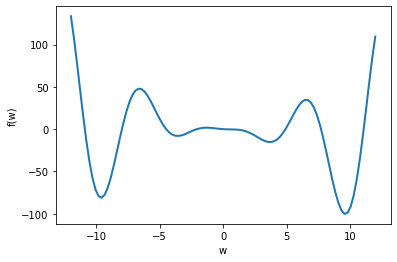

In [6]:

import numpy as np
import numpy.matlib as mat
import numpy.linalg as la
import matplotlib.pyplot as plt

# function f
def f(w):
    return w*w*np.cos(w)-w

def grad_f(w):
    return 2*w*np.cos(w)-w*w*np.sin(w)-1

n = 100
p=1
w = np.linspace(-12,12,num=n) 
myf = f(w)
plt.plot(w, myf, linewidth =2)
plt.xlabel('w')
plt.ylabel('f(w)')
plt.show()


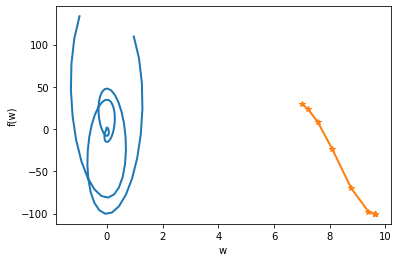

[[7.        ]
 [7.22637712]
 [7.57420145]
 [8.09374818]
 [8.77853737]
 [9.39276833]
 [9.61876285]
 [9.63917741]
 [9.63986316]
 [9.6398834 ]
 [9.63988399]]


In [9]:
tau = .01
max_iter = 10
w_hat = np.matrix(np.zeros((max_iter+1,1)))
f_hat = np.matrix(np.zeros((max_iter+1,1)))
w_hat[0] = 7 # initial value of w
f_hat[0] = f(w_hat[0]) # corresponding initial value of f

for k in range(max_iter):
    # implement gradient descent here
    # store new w in w_hat[k+1]
    # store new f(w) in f_hat[k+1]
    w_hat[k+1] = w_hat[k] - tau * grad_f(w_hat[k])
    f_hat[k+1] = f(w_hat[k+1])
    
plt.plot(w,myf,linewidth=2)
plt.plot (w_hat ,f_hat,'-*',linewidth =2)
plt.xlabel ('w')
plt.ylabel ('f(w)')
plt.show ()
print(w_hat)

From the result we can see, the w that minimized ***f(w)*** is ***w*** = 9.63988399 </p>

The method does not necessarily always find the best w. It could also stay at a local </p>
minimum value because the gradient descent algorithm is "locked" in a concave curve. </p>

It depends on both the initial guess wˆ(1) and the step size τ. </p>
If the initial guess is around the concaved area where minimum value is, then with gradient descent algorithm,</p>
we can reach to somewhere closer to the minimum value after several attempts regardless of the step size τ; </p>
If the step size τ is large, then even if we landed our initial guess somewhere far from the minimum value, we  </p>
could still "jump" out of the concaved curve where the local minimum lies.</p>
So, both factors are important to find the minimum.


#### 5.b

Text(0, 0.5, 'y')

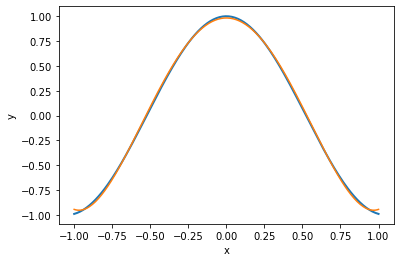

In [10]:
import numpy as np
import numpy.matlib as mat
import numpy.linalg as la
import matplotlib.pyplot as plt

n = 200
x = np.linspace(-1,1,n)
y = np.matrix(np.cos(3*x)).T

X = np.matrix([x**0, x**1, x**2, x**3, x**4, x**5]).T  # shape: (200, 6)

alt_w_hat = la.inv(X.T@X)@X.T@y

tau = 2.8e-3
max_iter = 5000
w_hat = np.matrix(np.zeros((6,max_iter+1)))
w_hat[:,0] = np.zeros([6,1])

plt.plot(x,y,linewidth =2,label='y␣=␣cos(x)')
plt.plot(x,X@alt_w_hat,label='Least␣squares␣fit')
plt.xlabel ('x')
plt.ylabel ('y')

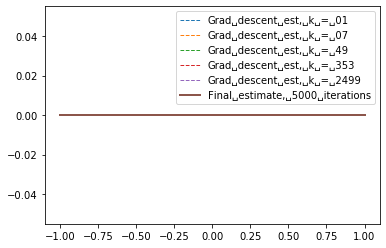

In [13]:
# function f
def grad_f(w):
    return -3 * np.sin(w)

for k in range(max_iter):
    ## put gradient descent code here
    w_hat[:, k+1] = w_hat[:, k] - tau * grad_f(w_hat[:,k])

ktype = np.logspace(0,np.log10(max_iter/2),5,base=10).astype(int)

for k in ktype:
    plt.plot(x,X@w_hat[:,k],'--',linewidth=1,label='Grad␣descent␣est,␣k␣=␣'+ format(k,'02d'))

plt.plot(x,X@w_hat[:,max_iter],'-',linewidth=2,label='Final␣estimate,␣' + format(max_iter,'02d')+'␣iterations')
plt.legend()
